In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/ML works/dataset recycled aggregate natural fiber.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


Cem   W/B     FA     CA  RCA  SCM   SP   NF     FT  Length  Age     CS
0  380.0  0.40  950.0  650.0   50  0.0  8.0  1.0  Kenaf      25    7  31.37
1  380.0  0.40  950.0  650.0   50  0.0  8.0  1.0  Kenaf      25   28  44.18
2  380.0  0.35  950.0  650.0   50  0.0  8.0  0.0      x       0    7  36.36
3  380.0  0.35  950.0  650.0   50  0.0  8.0  0.0      x       0   28  48.45
4  375.0  0.57  815.0  995.0    0  0.0  0.0  0.0      x       0   28  25.10

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset into a DataFrame
data = pd.read_csv('/content/drive/MyDrive/ML works/dataset recycled aggregate natural fiber.csv')

# Fill missing values in numeric columns with the mean of the respective column
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values in categorical columns with the mode of the respective column
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Fill missing values in numeric columns with the mean of the respective column
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values in categorical columns with the mode of the respective column
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Define input and target variables
input_features = ['Cem', 'W/B', 'FA', 'CA',
                  'RCA', 'SCM', 'SP', 'NF',
                  'FT', 'Length', 'Age']
# Convert categorical feature 'Fiber Type' to numeric
data = pd.get_dummies(data, columns=['FT'], drop_first=True)

# Update input features to include the new dummy variables
input_features = [col for col in data.columns if col not in ['CS']]

# Define target variables
target_variables = ['CS']

# Split the data into input features (X) and target variables (y)
X = data[input_features]
y = data[target_variables]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Train XGBoost model
xgb_model = MultiOutputRegressor(xgb.XGBRegressor())
xgb_model.fit(X_train, y_train)

# Predict and evaluate XGBoost model
y_pred_xgb = xgb_model.predict(X_test)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

(mape_xgb, rmse_xgb, r2_xgb)


(0.07837613037270175, 4.266792508502645, 0.9474373064366791)

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.7 MB/s eta 0:00:00


In [ ]:
import shap
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

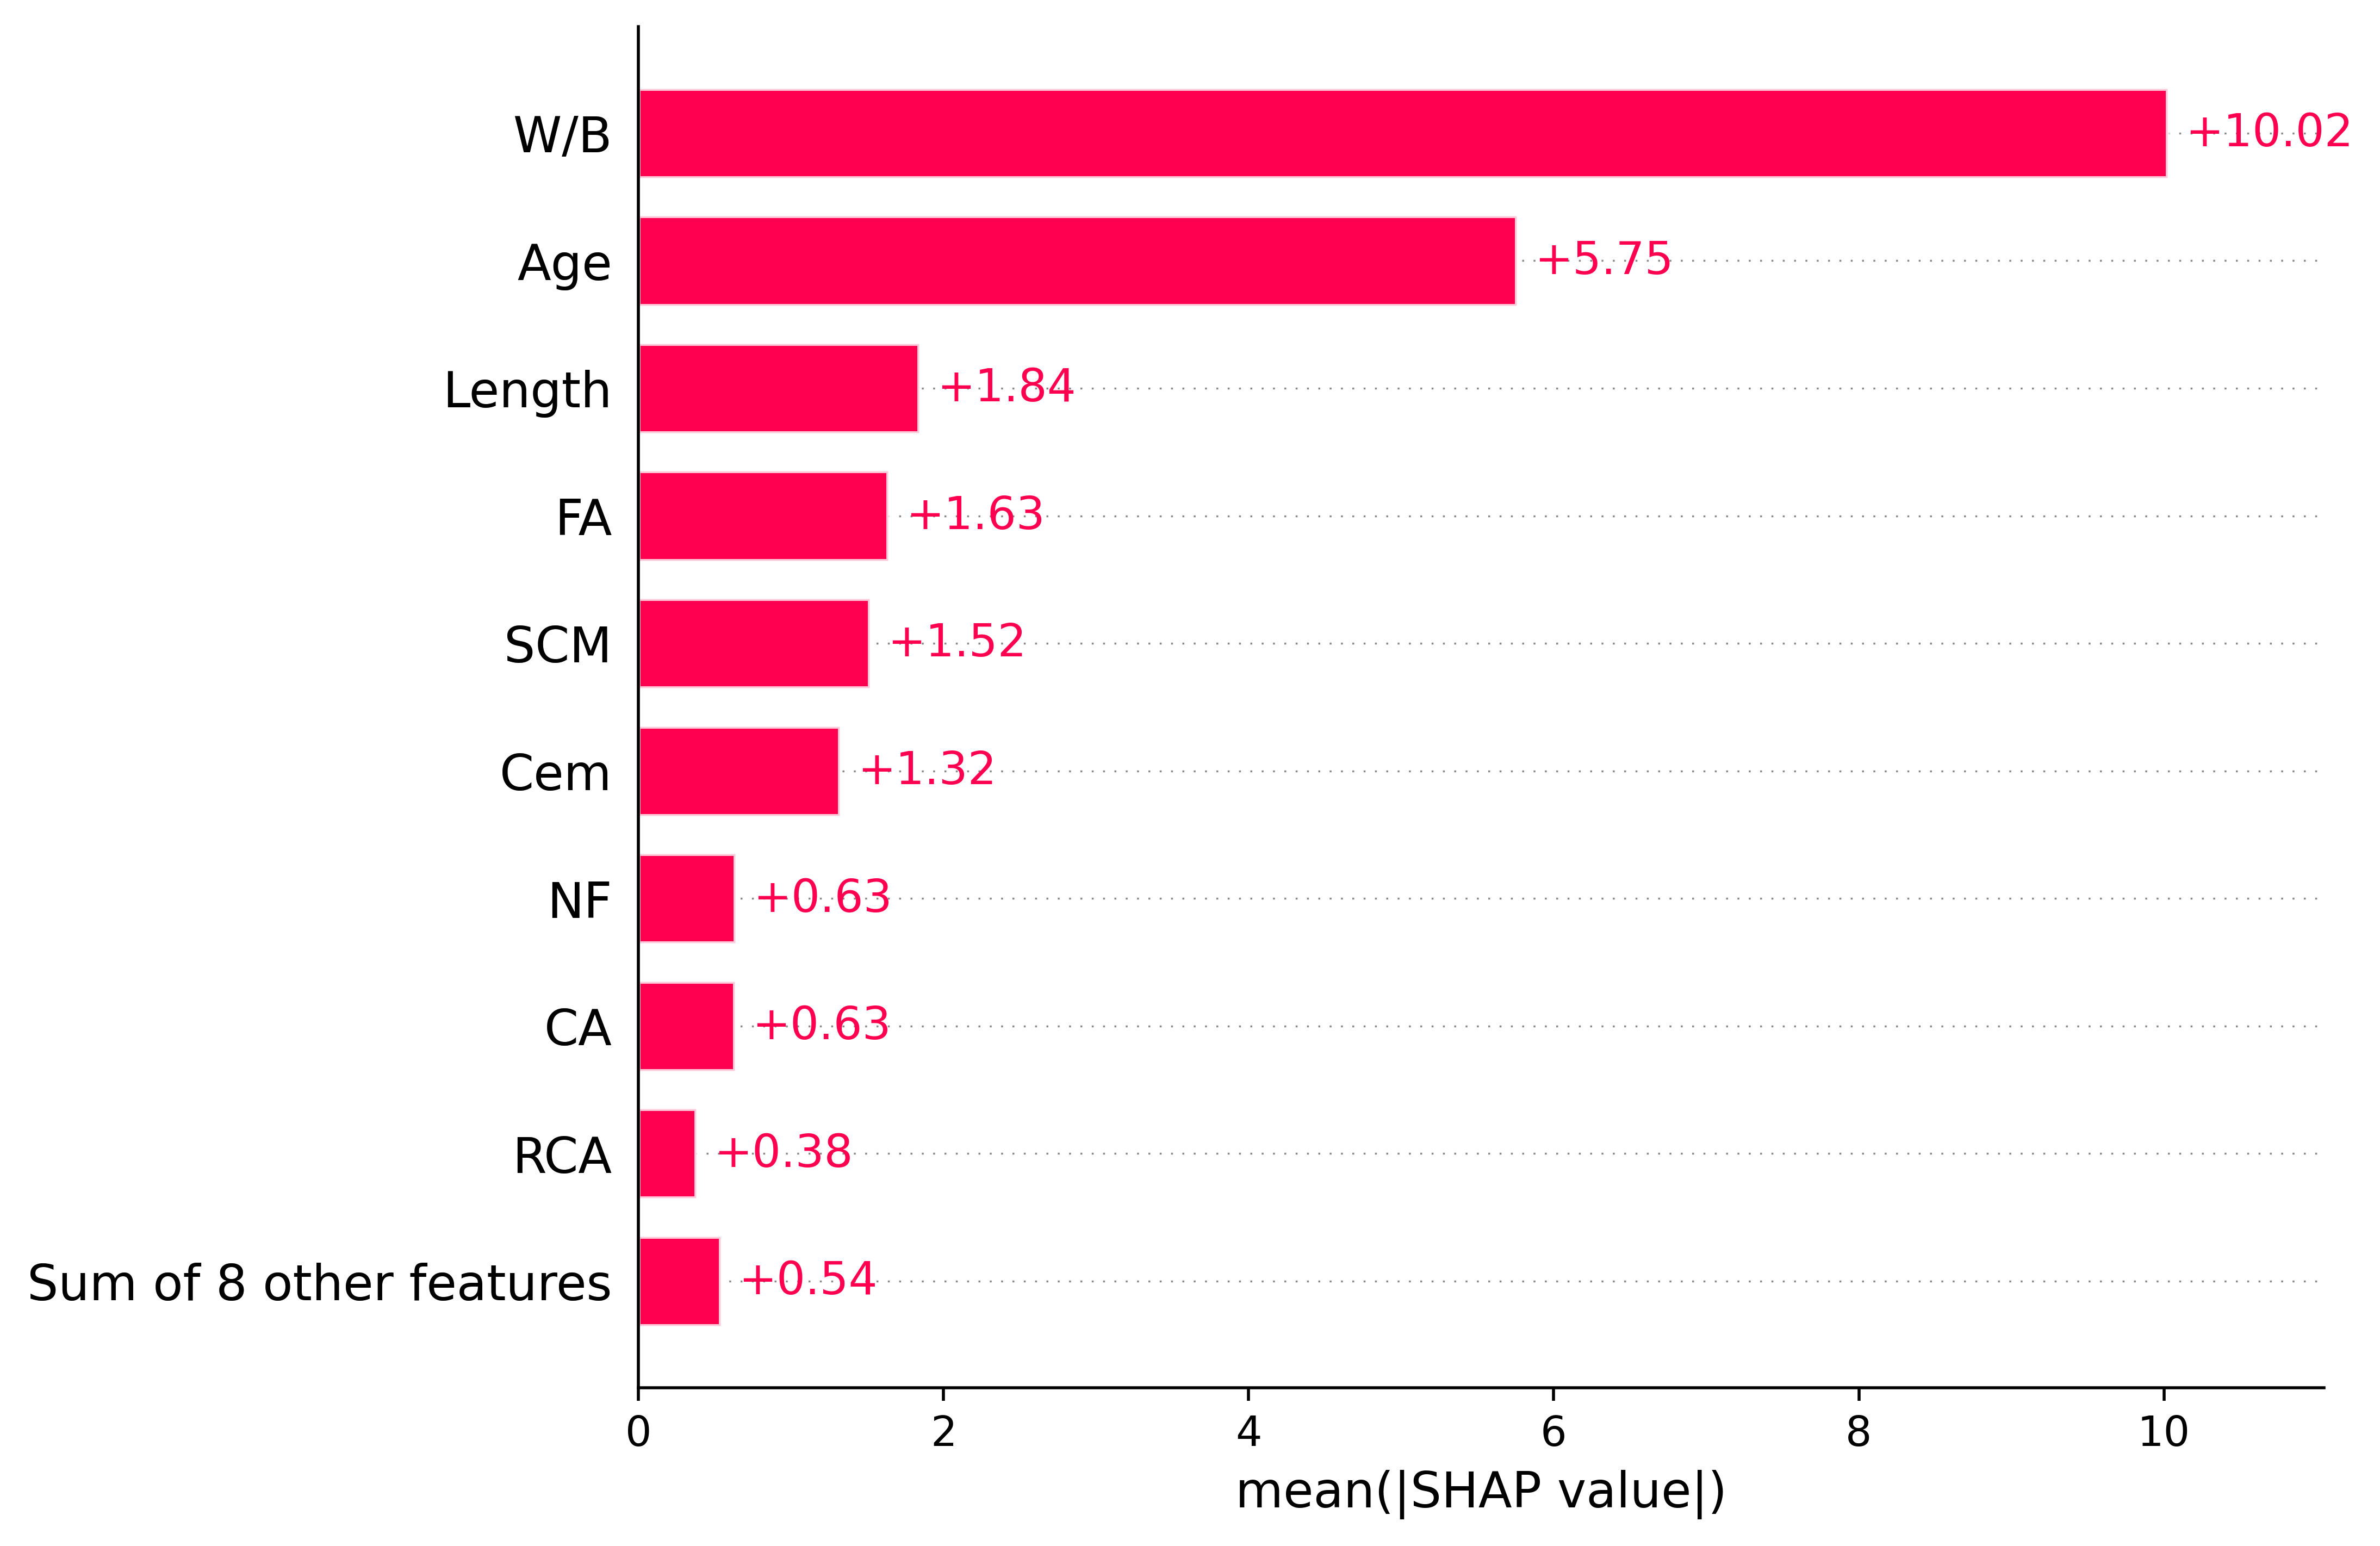

In [ ]:
# Convert the training data to a numpy array of floats
X_train_array = X_train.values.astype(np.float64)
X_test_array = X_test.values.astype(np.float64)

# Create a SHAP explainer for the XGBoost model
explainer_xgb_compressive = shap.Explainer(xgb_model.estimators_[0])

# Compute SHAP values for the test set
shap_values_xgb_compressive = explainer_xgb_compressive(X_test_array)

# Create a SHAP values object
shap_values_xgb = shap.Explanation(values=shap_values_xgb_compressive, feature_names=input_features)

# Visualize SHAP values (bar plot) for the XGBoost model with feature names
plt.figure(dpi=500)
shap.plots.bar(shap_values_xgb)
plt.show()

XGBoost: MAPE = 0.0784, RMSE = 4.2668, R2 = 0.9474


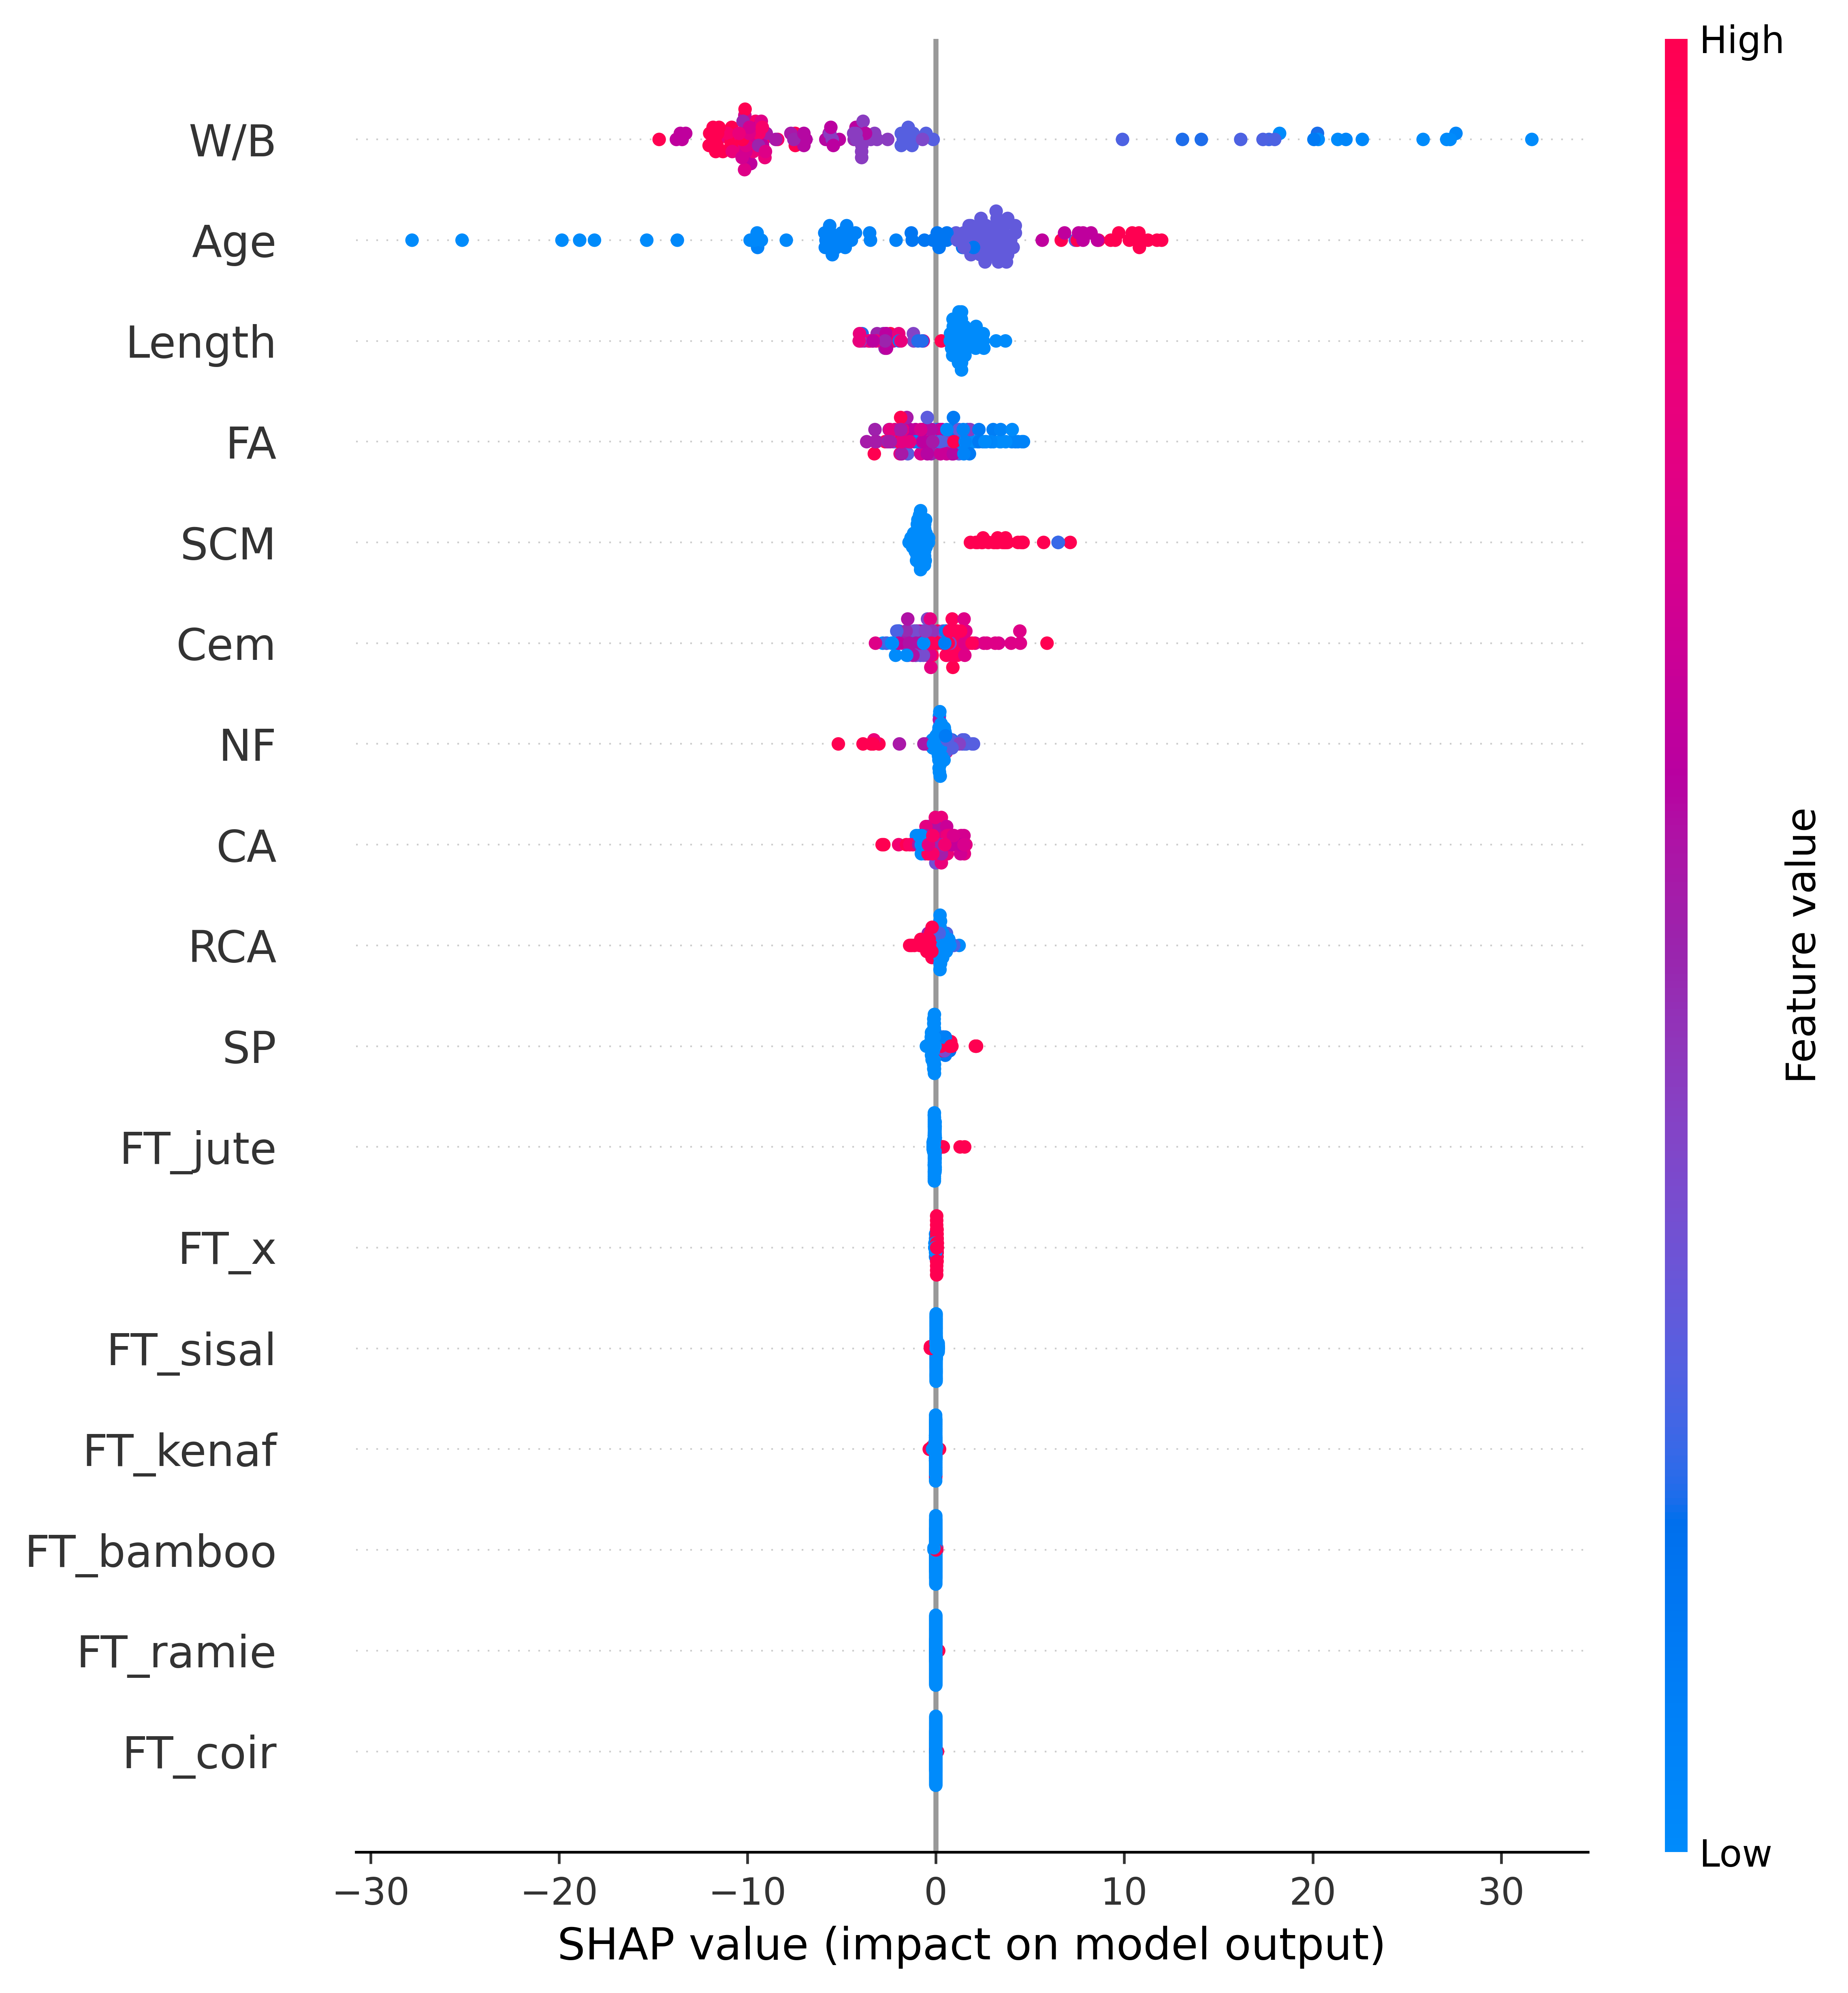

In [ ]:
# Output the evaluation metrics
print("XGBoost: MAPE = {:.4f}, RMSE = {:.4f}, R2 = {:.4f}".format(mape_xgb, rmse_xgb, r2_xgb))

# Generate SHAP values for the XGBoost model
explainer_xgb = shap.TreeExplainer(xgb_model.estimators_[0])
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Plot SHAP summary plot for XGBoost model with wider figure size
plt.figure(figsize=(16, 12), dpi=600)
shap.summary_plot(shap_values_xgb, X_test, feature_names=X_test.columns)
plt.show()


/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:839: UserWarning: not enough data in bin #3 for feature SP, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:839: UserWarning: not enough data in bin #8 for feature SP, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:839: UserWarning: not enough data in bin #10 for feature SP, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:839: UserWarning: not enough data in bin #1 for feature RCA, so it'll be ignored. Try increasing the number of records to plot.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:839: UserWarning: not enough data in bin #1 for feature NF, so it'll be ignored. Try increasing the nu

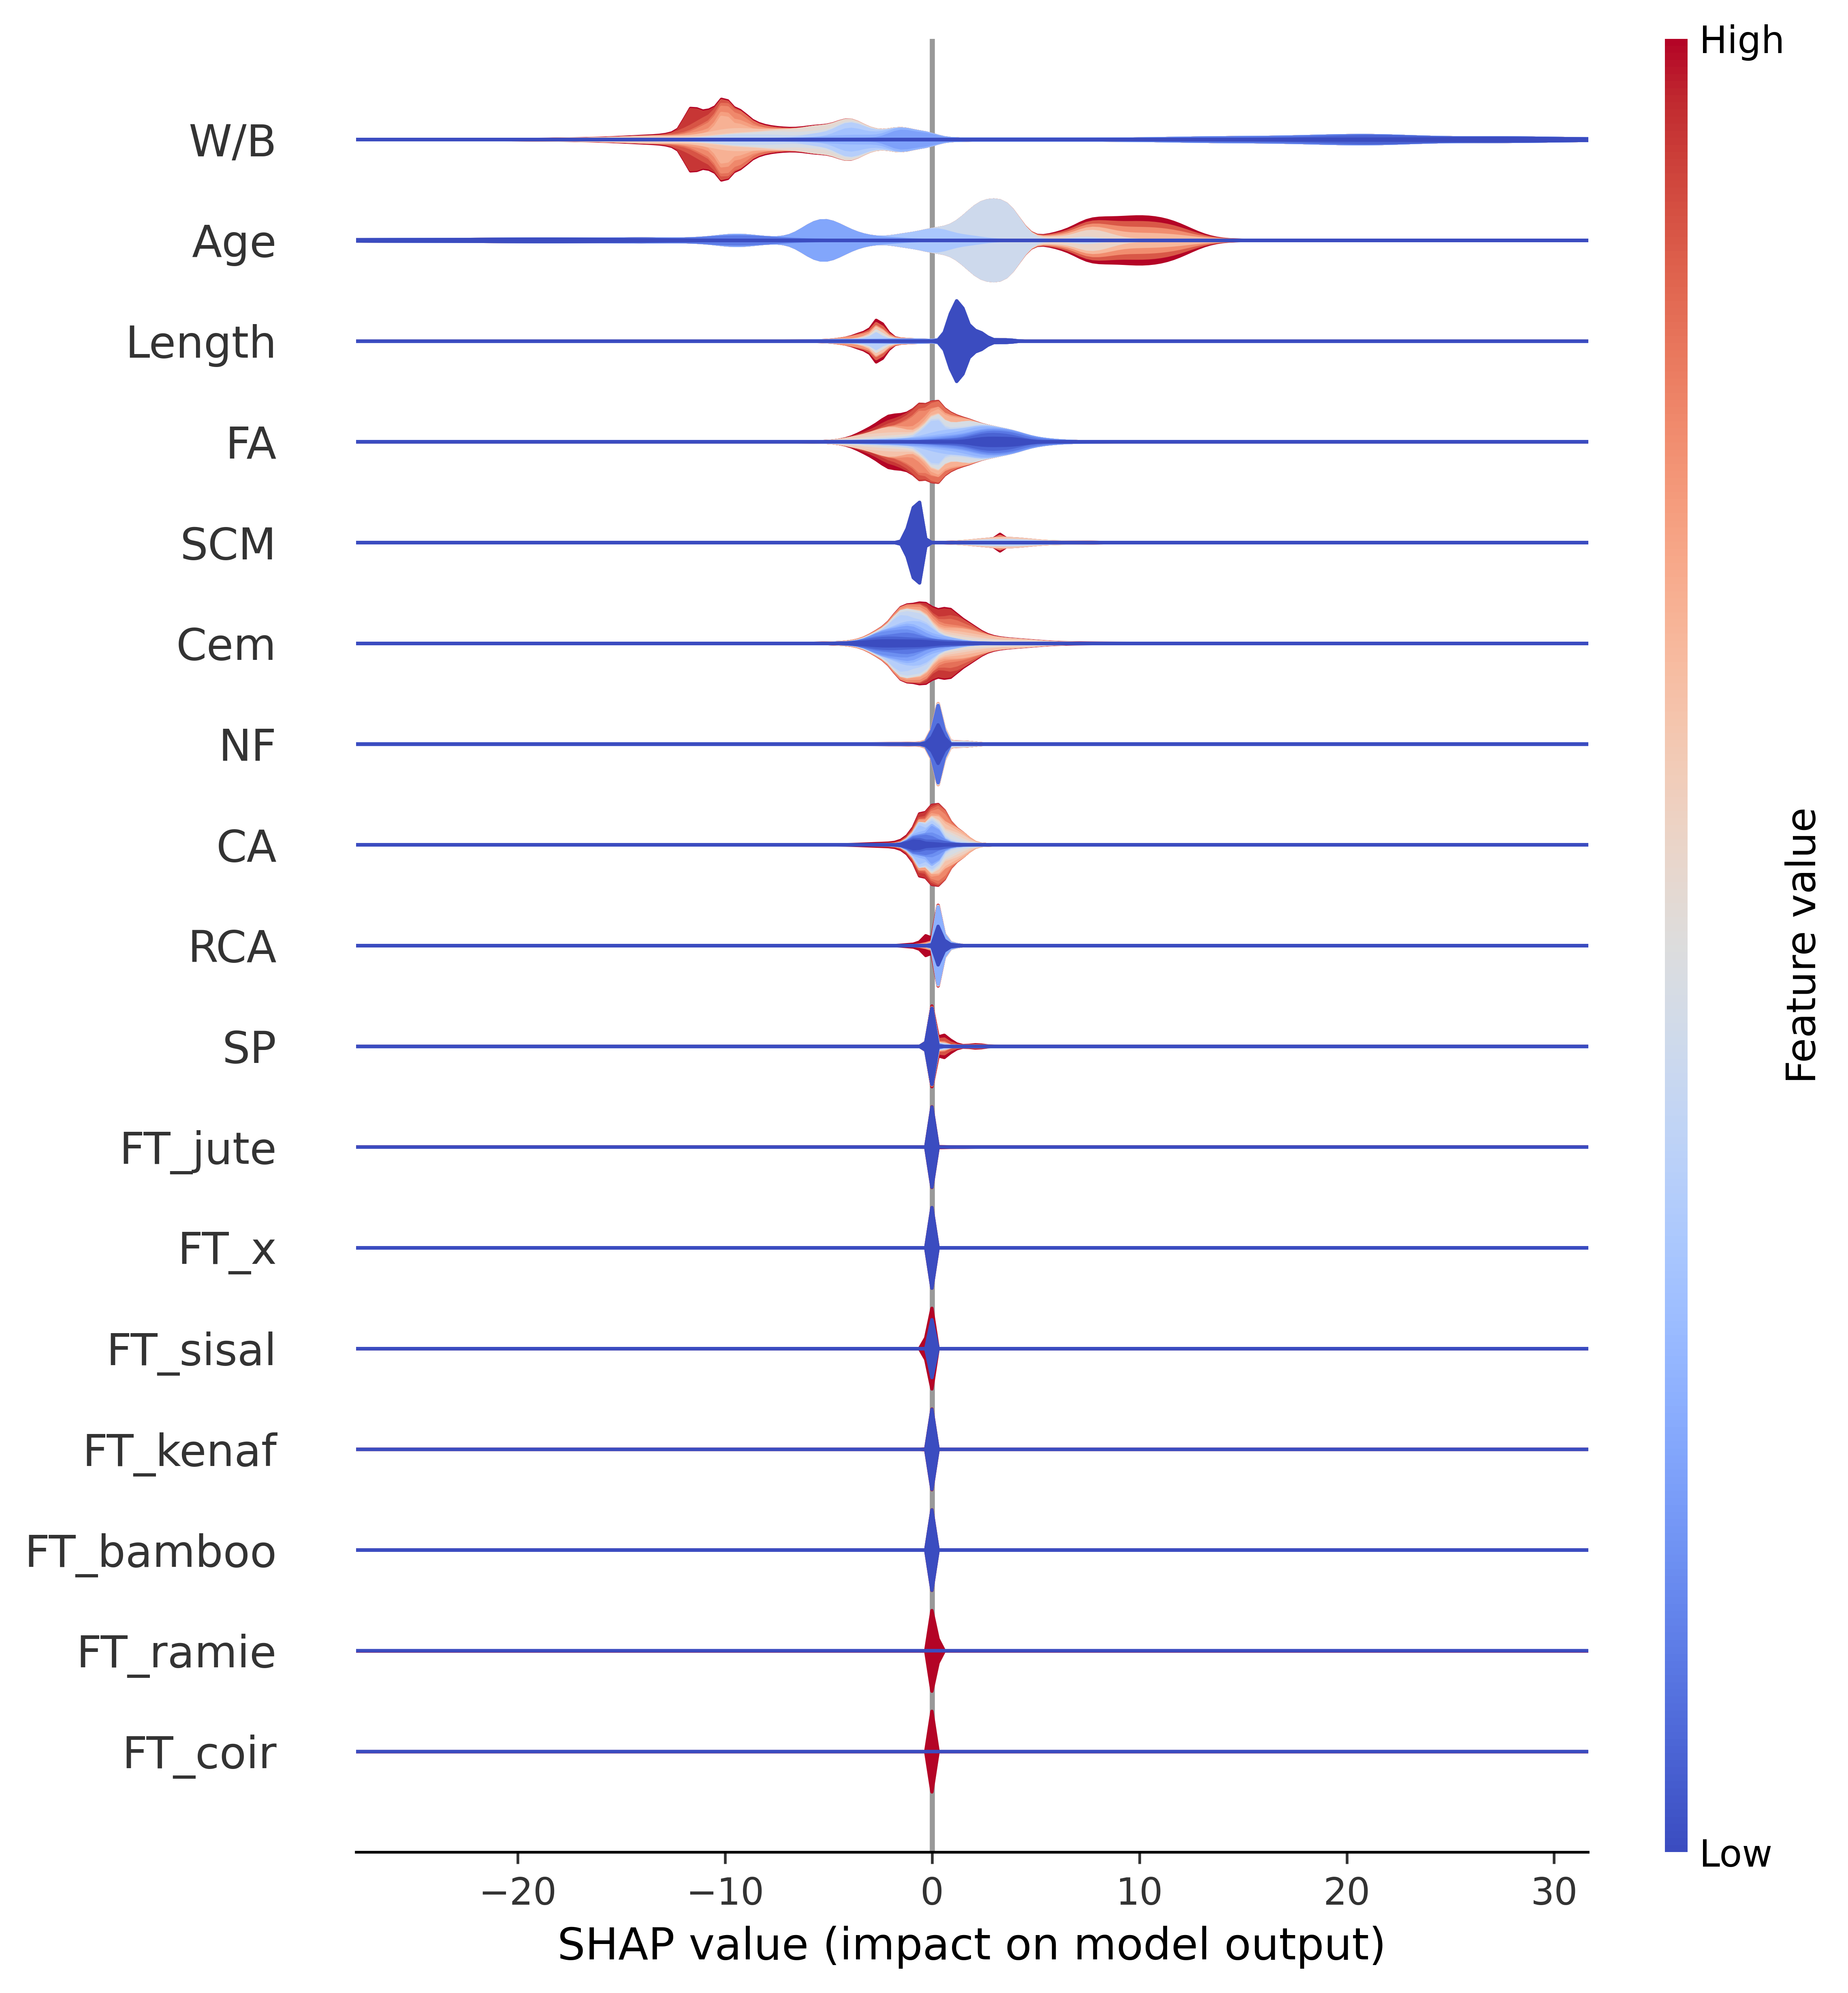

In [ ]:
# Generate SHAP values for the XGBoost model
explainer_xgb = shap.TreeExplainer(xgb_model.estimators_[0])
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Plot SHAP summary plot for XGBoost model with wider figure size
plt.figure(figsize=(16, 12), dpi=600)
shap.summary_plot(shap_values_xgb, X_test, feature_names=X_test.columns, plot_type="layered_violin", color="coolwarm")
plt.show()

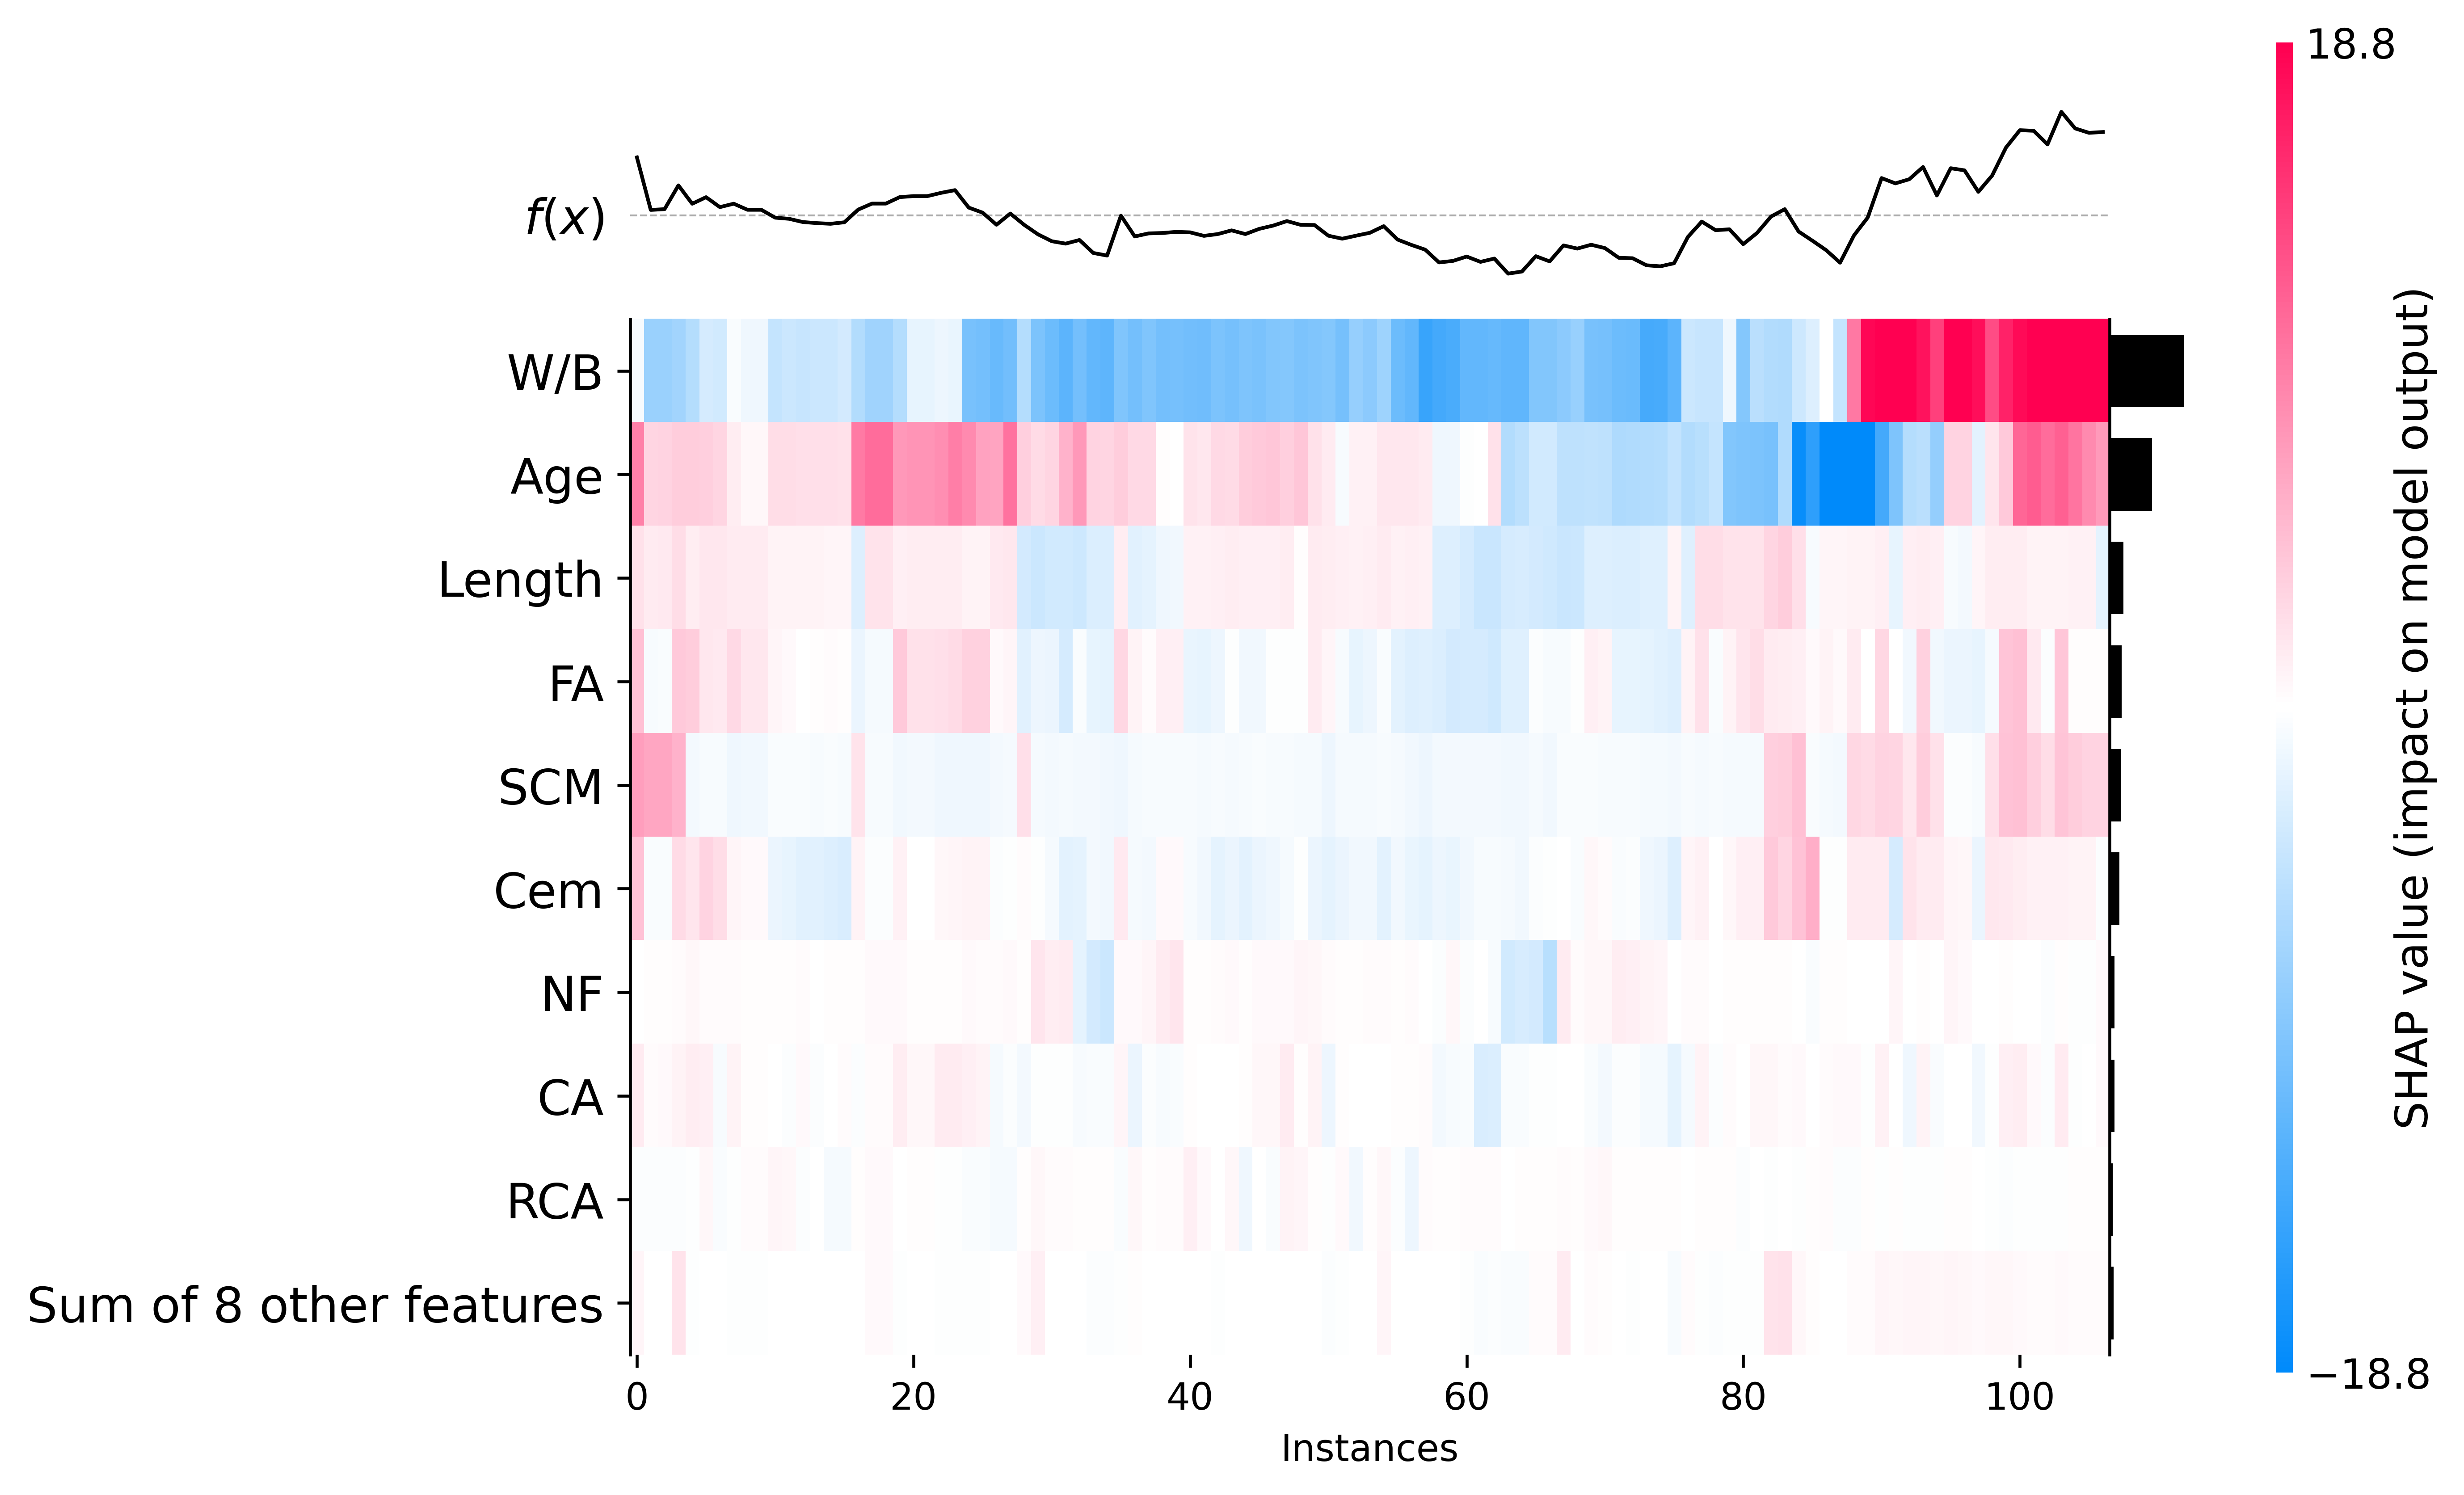

In [ ]:
# Generate SHAP values for the XGBoost model
explainer_xgb = shap.TreeExplainer(xgb_model.estimators_[0])
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Create a SHAP Explanation object
shap_explanation = shap.Explanation(shap_values_xgb, data=X_test.values, feature_names=X_test.columns)

# Plot SHAP heatmap for XGBoost model with wider figure size
plt.figure(figsize=(16, 12), dpi=600)
shap.plots.heatmap(shap_explanation) # Pass the SHAP Explanation object to heatmap
plt.show()

<Figure size 7200x4800 with 0 Axes>

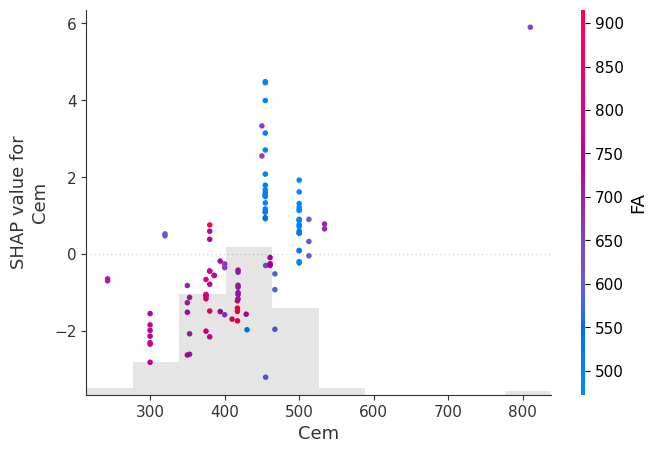

<Figure size 7200x4800 with 0 Axes>

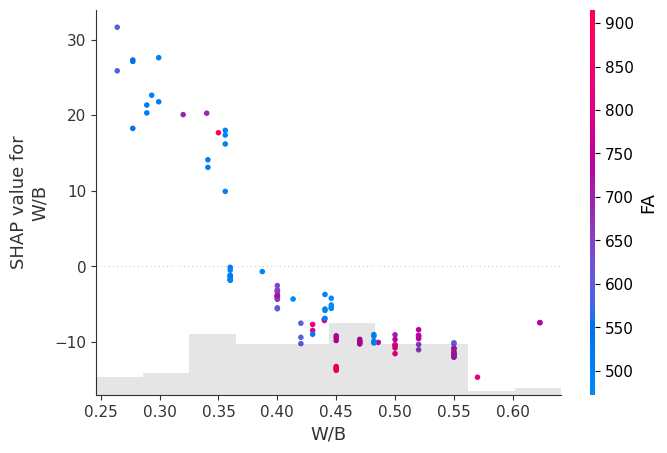

<Figure size 7200x4800 with 0 Axes>

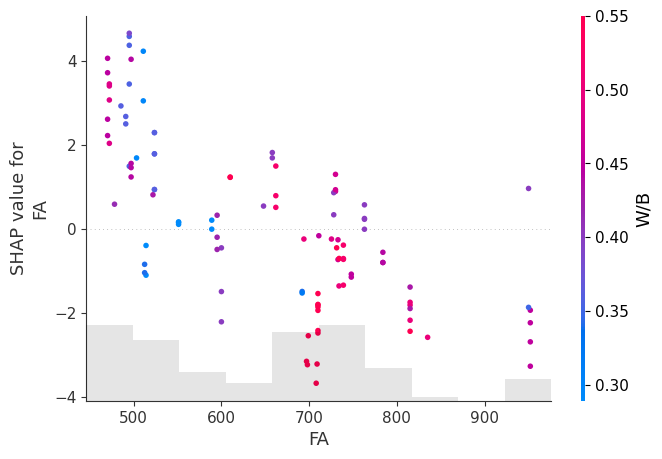

<Figure size 7200x4800 with 0 Axes>

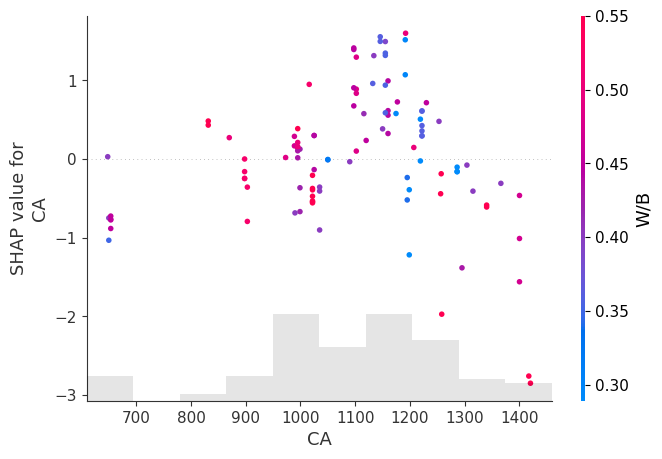

<Figure size 7200x4800 with 0 Axes>

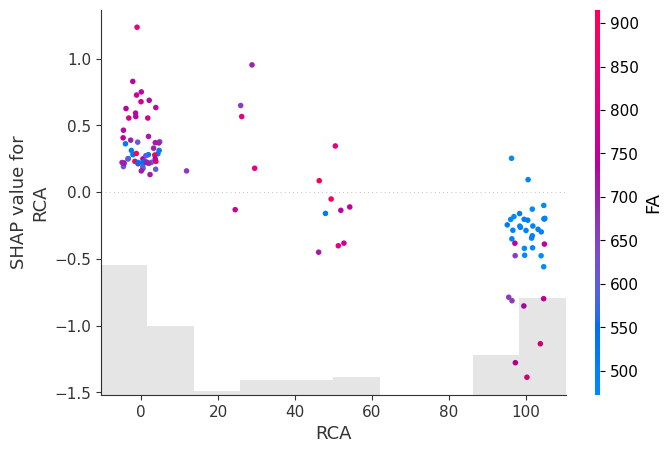

<Figure size 7200x4800 with 0 Axes>

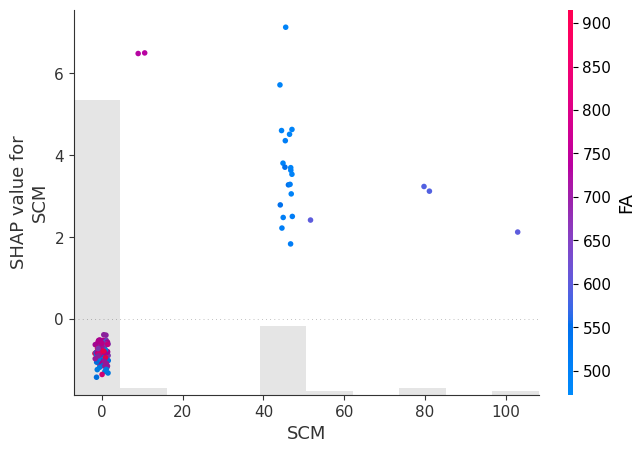

<Figure size 7200x4800 with 0 Axes>

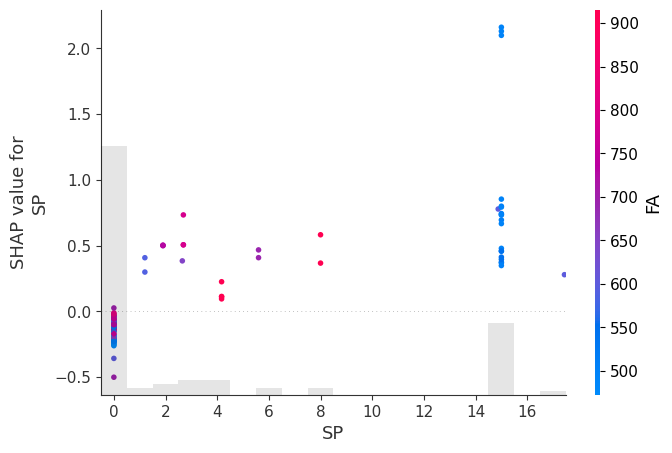

<Figure size 7200x4800 with 0 Axes>

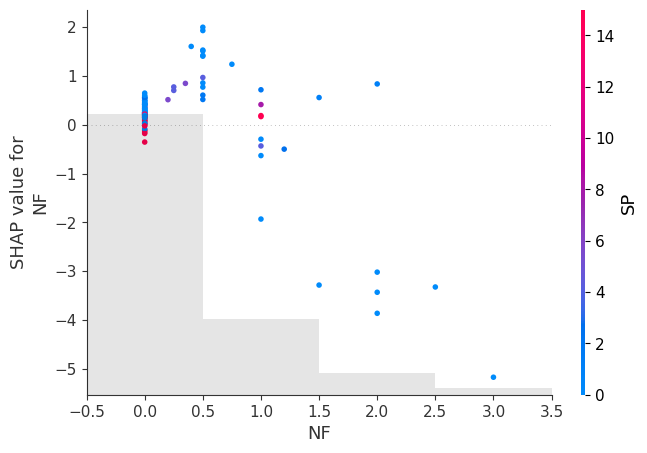

<Figure size 7200x4800 with 0 Axes>

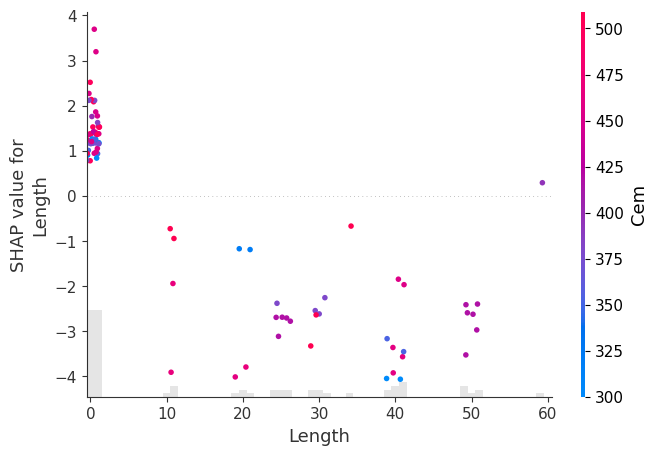

<Figure size 7200x4800 with 0 Axes>

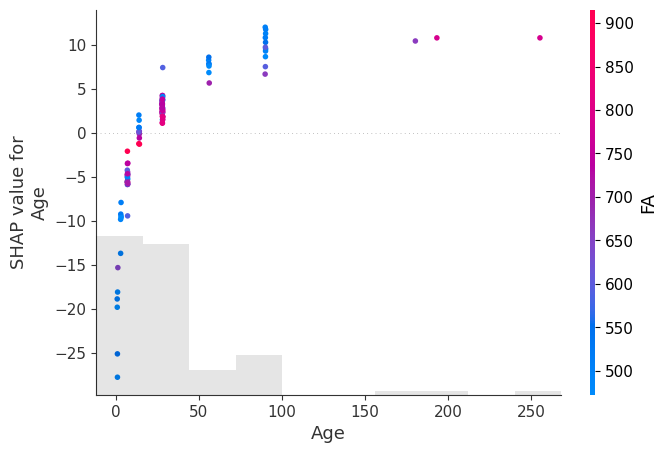

In [ ]:
# Compute SHAP values
explainer_xgb = shap.TreeExplainer(xgb_model.estimators_[0])
shap_values_xgb = explainer_xgb(X_test)

# Define the features with their corresponding indices
features = {
    'Cement (kg/m3)': 'Cem',
    'W/B': 'W/B',
    'Fine Aggregate (kg/m3)': 'FA',
    'Coarse Aggregate (kg/m3)': 'CA',
    'RCA percentage (%)': 'RCA',
    'SCM (kg/m3)': 'SCM',
    'SP (kg/m3)': 'SP',
    'Natural fiber (%)': 'NF',
    'Length (mm)': 'Length',
    'Age (day)': 'Age'
}

# Plot SHAP scatter plots for different features
for feature_name, feature_index in features.items():
    plt.figure(num=None, figsize=(12, 8), dpi=600)
    shap.plots.scatter(shap_values_xgb[:, feature_index], color=shap_values_xgb)
    plt.show()

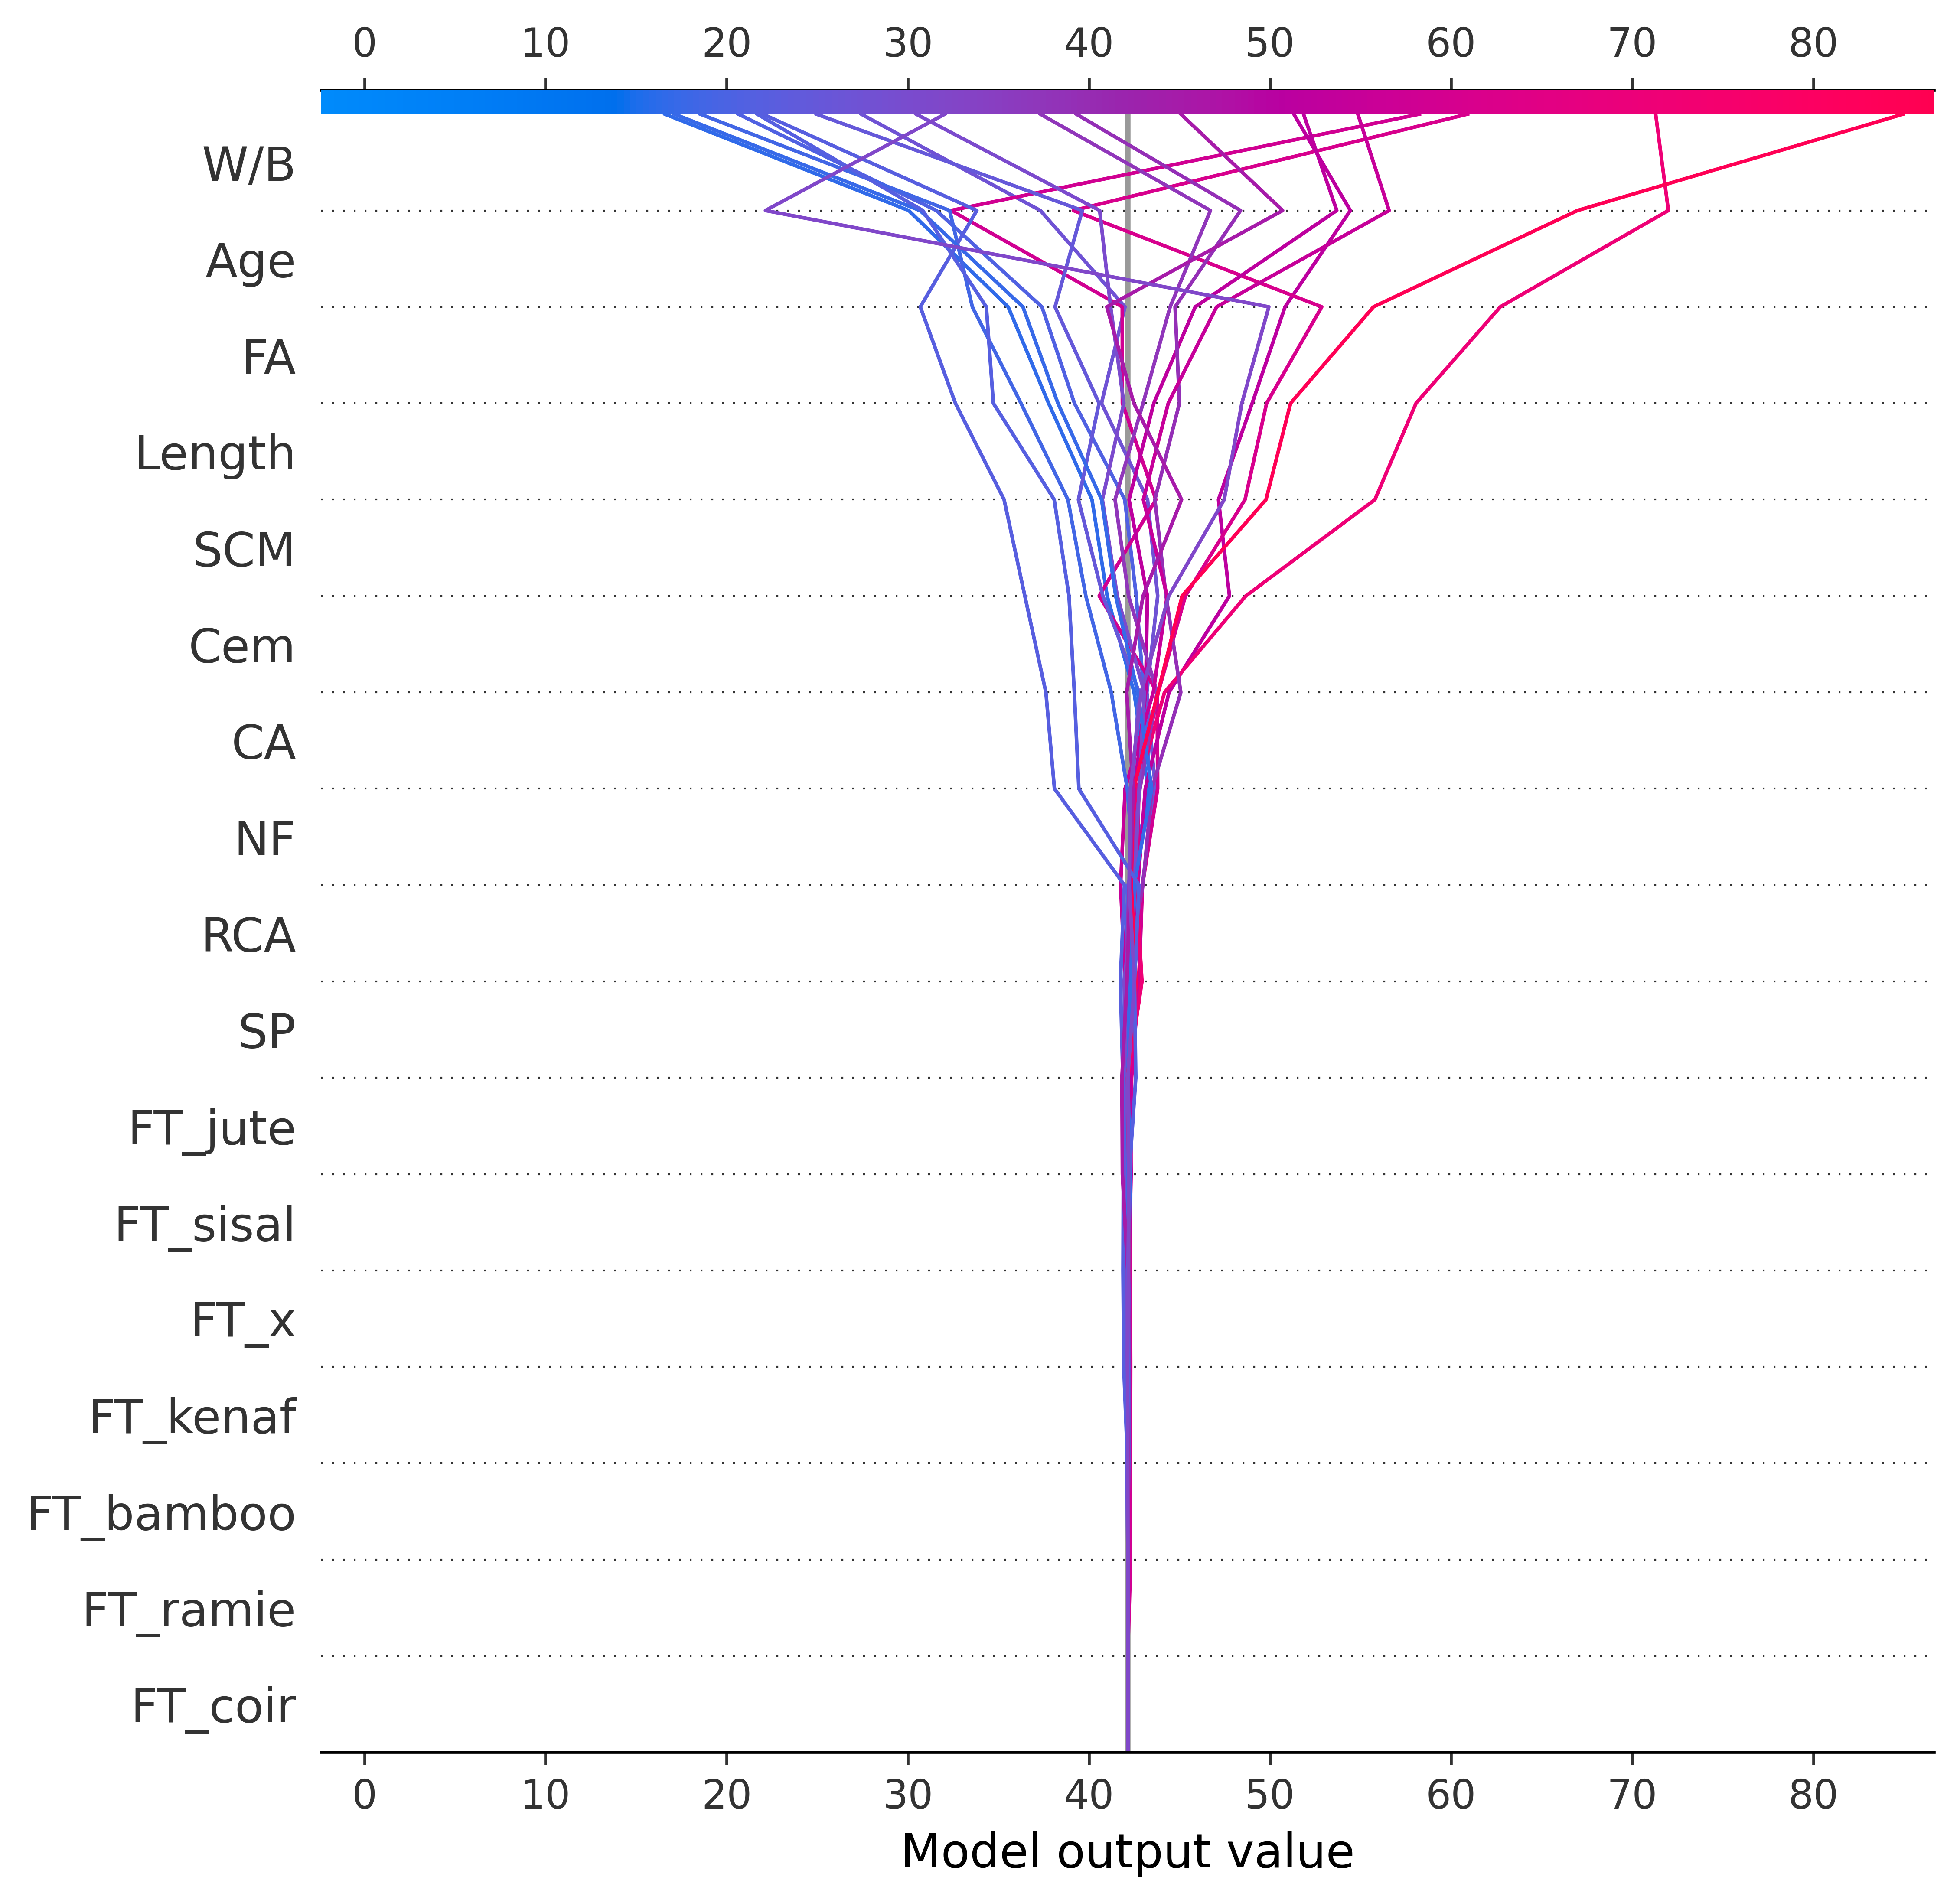

In [ ]:
import warnings
shap.initjs()

# Select a single output for SHAP analysis (Compressive Strength)
model = xgb_model.estimators_[0]
explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value

# Select a subset of features for SHAP analysis
select = range(20)
features = X_test.iloc[select]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)
    shap_interaction_values = explainer.shap_interaction_values(features)

# Generate SHAP decision plot for Compressive Strength
plt.figure(num=None, figsize=(1920, 1080), dpi=600)
shap.decision_plot(expected_value, shap_values, features)
plt.show()


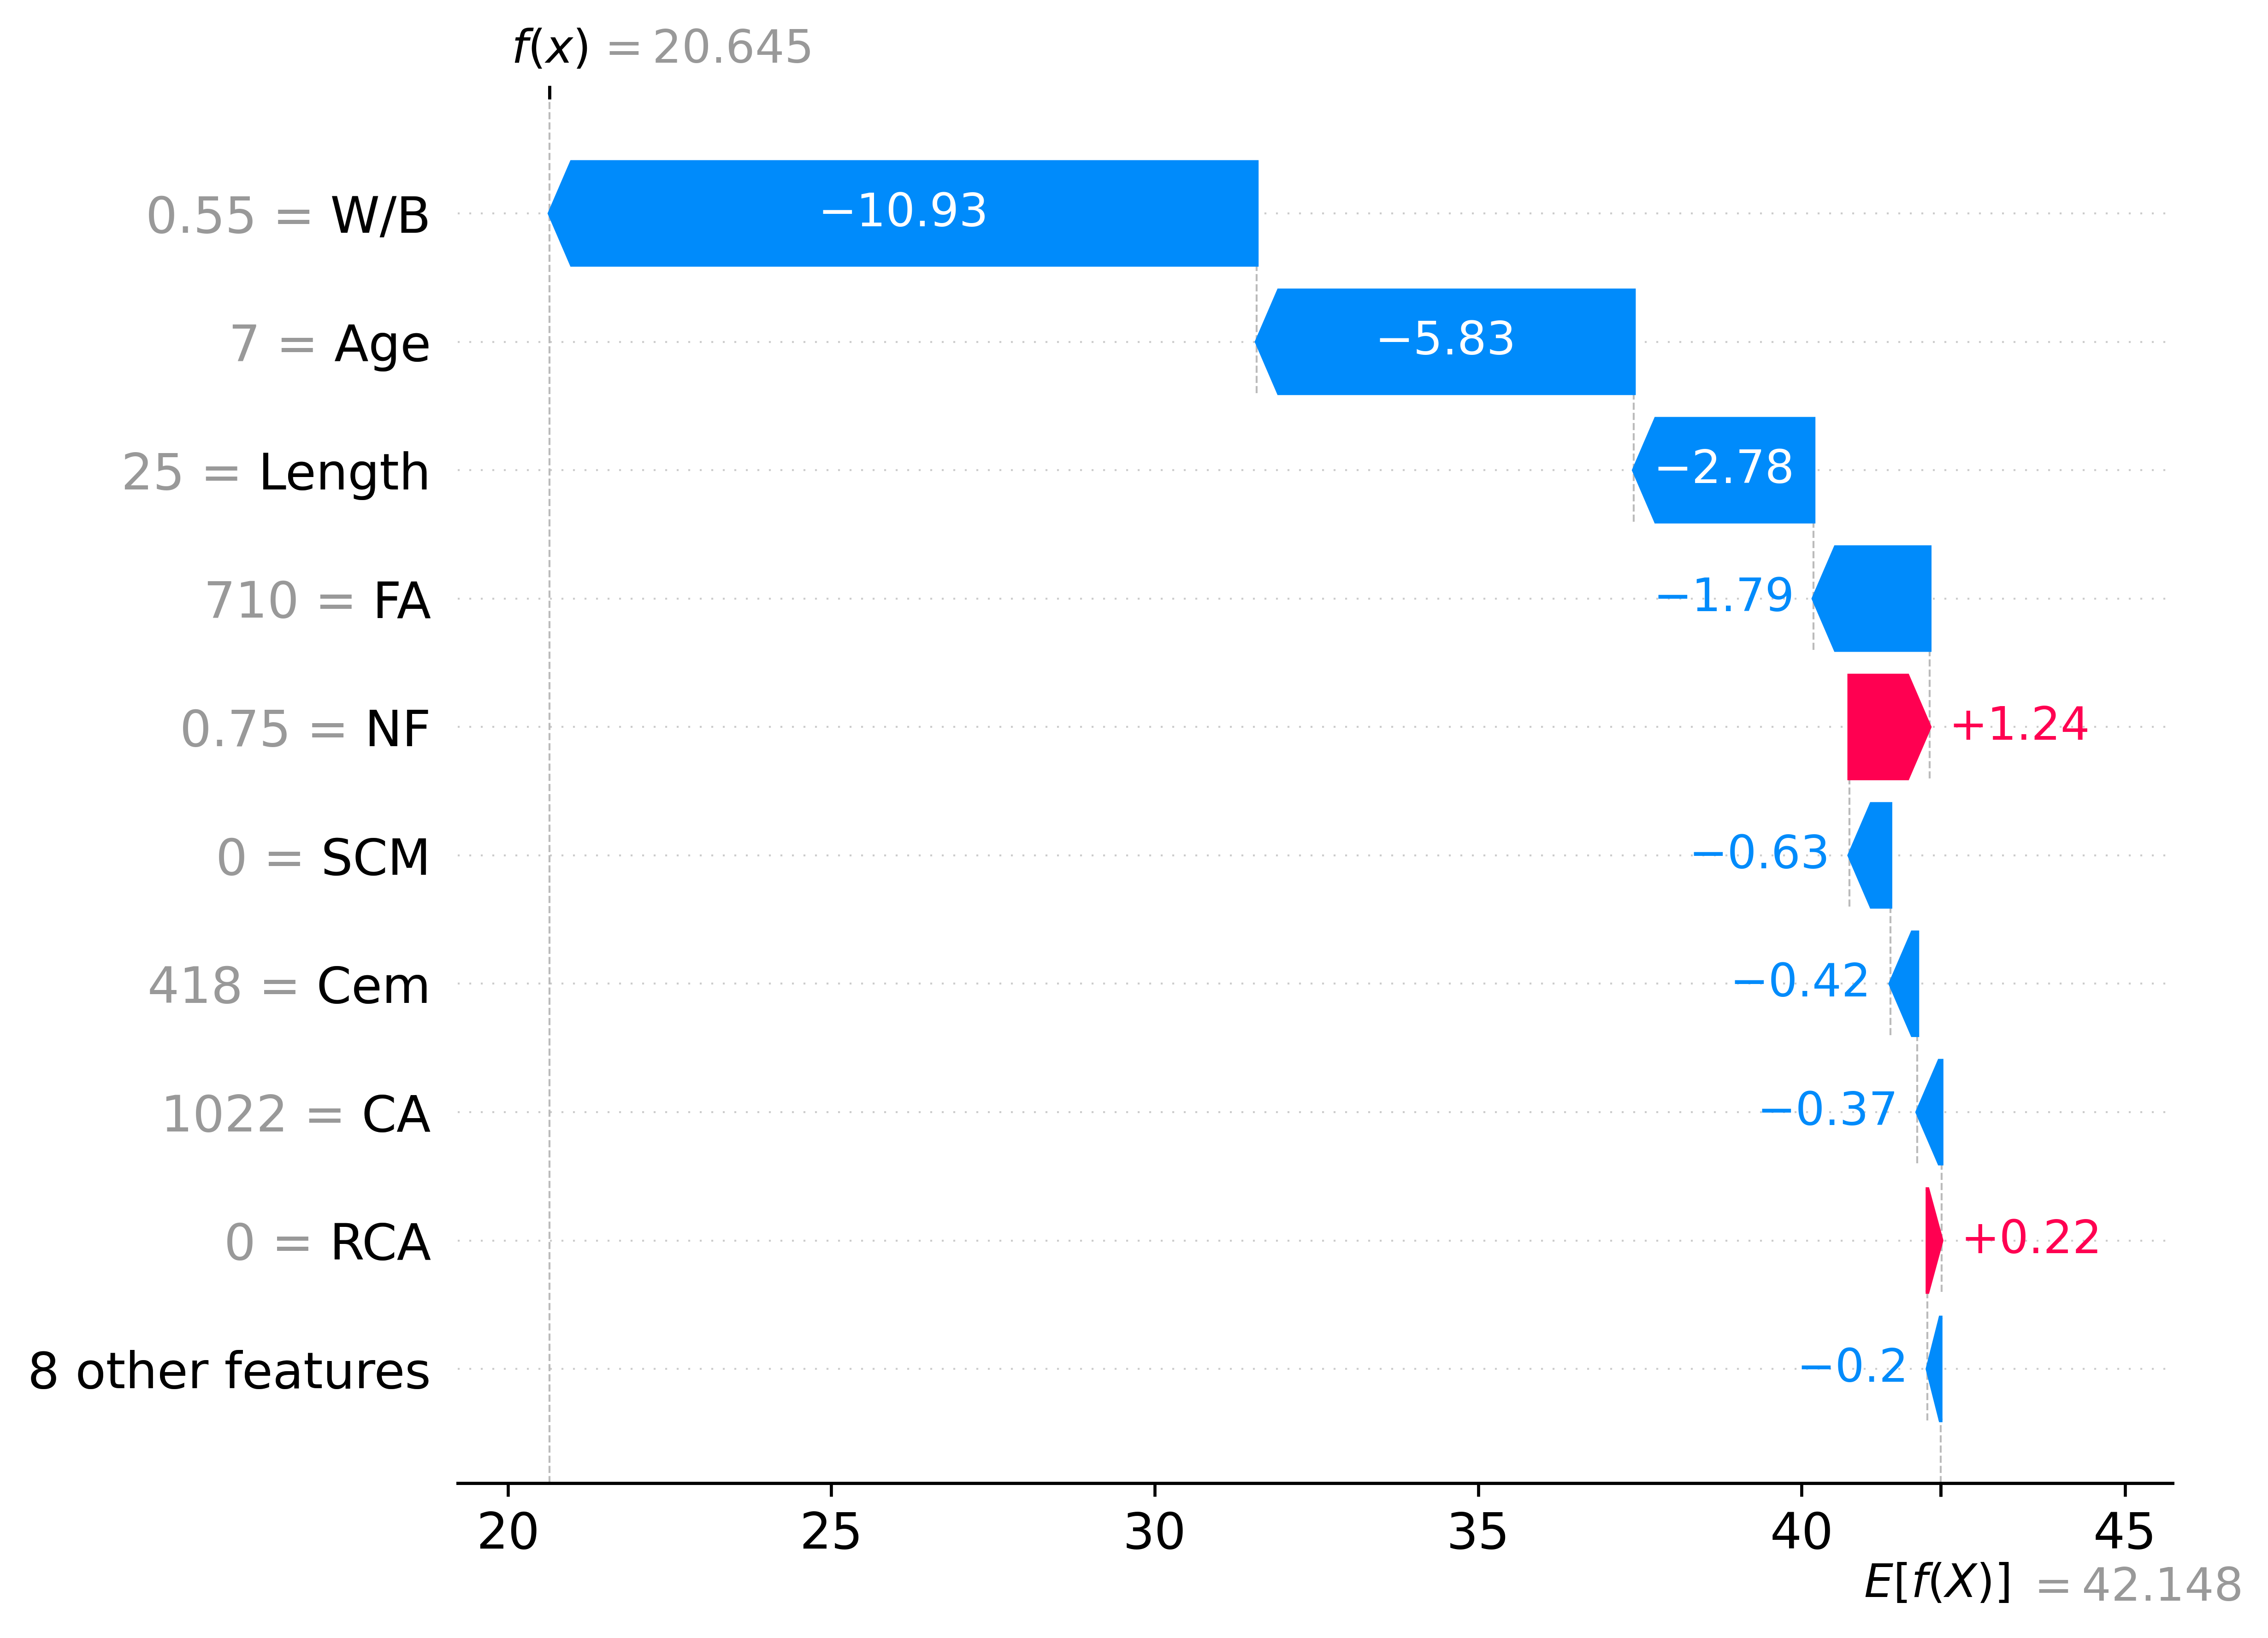

In [ ]:
# SHAP analysis for interpretability
# Note: SHAP currently doesn't support MultiOutputRegressor directly, so we need to analyze each output separately
shap.initjs()

# Select a single output for SHAP analysis (Compressive Strength)
model = xgb_model.estimators_[0]
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)

# Generate SHAP waterfall plot for the first prediction instance of Compressive Strength
plt.figure(num=None, figsize=(1920, 1080), dpi=600)
shap.plots.waterfall(shap_values[0])
